In [2]:
import warnings
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import gurobipy as gp
import ta
import quantstats as qs
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

pd.set_option('future.no_silent_downcasting', True)

benchmark = ['SPY','^DJI']

# dji_components = {
#     "2004-04-08": ["AA", "AIG", "AXP", "BA", "C", "CAT", "DD", "DIS", "GE", "HD", "HON", 'HPQ', "IBM", "INTC", "JNJ", "JPM", "KO", "MCD", "MMM", "MO", "MRK", "MSFT", "PFE", "PG", "T", "VZ", "WMT", "XOM"],
#     #add "BAC", "CVX"; remove "HON", "MO"
#     "2008-02-19": ["AA", "AIG", "AXP", "BA", "BAC", "C", "CAT", "CVX", "DD", "DIS", "GE", "HD", 'HPQ', "IBM", "INTC", "JNJ", "JPM", "KO", "MCD", "MMM", "MRK", "MSFT", "PFE", "PG", "T", "VZ", "WMT", "XOM"],
#     #remove "AIG"
#     "2008-09-22": ["AA", "AXP", "BA", "BAC", "C", "CAT", "CVX", "DD", "DIS", "GE", "HD", 'HPQ', "IBM", "INTC", "JNJ", "JPM", "KO", "MCD", "MMM", "MRK", "MSFT", "PFE", "PG", "T", "VZ", "WMT", "XOM"],
#     #add "TRV", "CSCO"; remove "C"
#     "2009-06-08": ["AA", "AXP", "BA", "BAC", "CAT", "CSCO", "CVX", "DD", "DIS", "GE", "HD", 'HPQ', "IBM", "INTC", "JNJ", "JPM", "KO", "MCD", "MMM", "MRK", "MSFT", "PFE", "PG", "T", "TRV", "VZ", "WMT", "XOM"],
#     #add "UNH"
#     "2012-09-24": ["AA", "AXP", "BA", "BAC", "CAT", "CSCO", "CVX", "DD", "DIS", "GE", "HD", 'HPQ', "IBM", "INTC", "JNJ", "JPM", "KO", "MCD", "MMM", "MRK", "MSFT", "PFE", "PG", "T", "TRV", "UNH", "VZ", "WMT", "XOM"],
#     #add "GS", "NKE"; remove "AA", "BAC", 'HPQ' 
#     "2013-09-23": ["AXP", "BA", "CAT", "CSCO", "CVX", "DD", "DIS", "GE", "GS", "HD", "IBM", "INTC", "JNJ", "JPM", "KO", "MCD", "MMM", "MRK", "MSFT", "NKE", "PFE", "PG", "T", "TRV", "UNH", "VZ", "WMT", "XOM"],
#     #add "AAPL"; remove "T"
#     "2015-03-19": ["AXP", "AAPL", "BA", "CAT", "CSCO", "CVX", "DD", "DIS", "GE", "GS", "HD", "IBM", "INTC", "JNJ", "JPM", "KO", "MCD", "MMM", "MRK", "MSFT", "NKE", "PFE", "PG", "TRV", "UNH", "VZ", "WMT", "XOM"],
#     #add "WBA"; remove "GE"
#     "2018-06-26": ["AXP", "AAPL", "BA", "CAT", "CSCO", "CVX", "DD", "DIS", "GS", "HD", "IBM", "INTC", "JNJ", "JPM", "KO", "MCD", "MMM", "MRK", "MSFT", "NKE", "PFE", "PG", "TRV", "UNH", "VZ", "WBA", "WMT", "XOM"],
#     #remove "DD"
#     "2019-04-02": ["AXP", "AAPL", "BA", "CAT", "CSCO", "CVX", "DIS", "GS", "HD", "IBM", "INTC", "JNJ", "JPM", "KO", "MCD", "MMM", "MRK", "MSFT", "NKE", "PFE", "PG", "TRV", "UNH", "VZ", "WBA", "WMT", "XOM"],
#     #add "AMGN", "HON"; remove "XOM", "PFE"  
#     "2020-08-31": ["AXP", "AAPL", "AMGN", "BA", "CAT", "CSCO", "CVX", "DIS", "GS", "HD", "HON", "IBM", "INTC", "JNJ", "JPM", "KO", "MCD", "MMM", "MRK", "MSFT", "NKE", "PG", "TRV", "UNH", "VZ", "WBA", "WMT"],
    
#     # Add future changes here...
#     "Union": ['AA', 'AIG', 'AAPL', 'AMGN', 'AXP', 'BA', 'BAC', 'C', 'CAT', 'CSCO', 'CVX', 'DD', 'DIS', 'GE', 'GS', 'HD', 'HON', 'HPQ', 'IBM', 'INTC',
#               'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MO', 'MRK', 'MSFT', 'NKE', 'PFE', 'PG', 'T', 'TRV', 'UNH', 'VZ', 'WBA', 'WMT', 'XOM'],
#     "Removed" : ['CRM', 'DOW', 'DWDP', 'GM', "KHC", 'SBC', 'UTX', 'V'],
# }

sp_components = {
    "2004-04-08": ['XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY'],
    #add "XLRE"
    "2015-10-08": ['XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY', 'XLRE'],
    #add "XLC"
    "2018-06-19": ['XLB', 'XLC', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY', 'XLRE'],
    
    # Add future changes here...
    "Union": ['XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY', 'XLC', 'XLRE'],
    "Removed" : [],
}

# comb_components = {
#     "2004-04-08": ['QQQ','RDVT','NNDM','ZOM','MSFT','JNJ','JPM','AGG','DBC','GLD','UNG','CORN','BOIL','CTA','DUST'],

#     # Add future changes here...
#     "Union": ['QQQ','RDVT','NNDM','ZOM','MSFT','JNJ','JPM','AGG','DBC','GLD','UNG','CORN','BOIL','CTA','DUST'],
#     "Removed" : [],
# }



_components = sp_components
_update_date = list(_components.keys())[:-2]
stocks = sorted(_components["Union"])

#stocks = ['SPY','AGG','DBC','GLD','VNQ']
#stocks = ['SPY', 'AGG', 'DBC', 'GLD', 'VNQ', 'EFA', 'VWO', 'QQQ', 'TLT', 'IEF', 'IWM', 'EWJ', 'EEM', 'FXI', 'GDX', 'SLV', 'HYG', 'LQD', 'TIP', 'XLE', 'XLK', 'XLF', 'XLV', 'XLY', 'VOO']


In [62]:
start = '2012-04-08' #2004/04/08 for DJI
end = '2024-02-25'

data = pd.DataFrame()
# Fetch the data for each stock and concatenate it to the `data` DataFrame
for stock in stocks:
    raw = yf.download(stock, start=start, end=end)
    print(f'{stock} start from {raw.index[0]}')
    raw['Symbol'] = stock  # Add a column indicating the stock symbol
    data = pd.concat([data, raw], axis=0)
df = data.pivot_table(index='Date', columns='Symbol', values='Adj Close').loc[start:]
df_returns = df.pct_change().fillna(0).dropna()
 
bdata = pd.DataFrame()
for bm in benchmark:
    braw = yf.download(bm, start=df.index[0], end=end)
    braw['Symbol'] = bm  # Add a column indicating the stock symbol
    bdata = pd.concat([bdata, braw], axis=0)
bdf = bdata.pivot_table(index='Date', columns='Symbol', values='Adj Close').dropna()
bdf_returns = bdf.pct_change().fillna(0).dropna()

class PortfolioStrategies:
    def __init__(self, df_returns, components):
        """
        Initialize the PortfolioStrategies class with returns data and components data.
        
        Parameters:
        df_returns (pd.DataFrame): DataFrame containing asset returns.
        components (dict): Dictionary containing dates and lists of asset components.
        """
        self.df_returns = df_returns
        self.components = components
        self.strategy_results = {}

    def get_assets_for_date(self, date):
        """
        Get the list of assets that are valid for a given date.
        
        Parameters:
        date (pd.Timestamp): The date to check against the components dictionary.
        
        Returns:
        list: List of assets valid for the given date.
        """
        sorted_dates = sorted([pd.to_datetime(d) for d in self.components.keys() if d != 'Union' and d != 'Removed'])
        applicable_date = max([d for d in sorted_dates if d <= date])
        return self.components[applicable_date.strftime('%Y-%m-%d')]

    def equal_weighting(self, exclude=None):
        """
        Calculate the equal-weighted portfolio returns.
        
        Parameters:
        exclude (str, optional): Column to exclude from the equal-weighting calculation.
        
        Returns:
        pd.DataFrame: DataFrame with the equal-weighted portfolio returns.
        """
        strategy = self.df_returns.copy()
        strategy['assets'] = 0
        strategy['Return'] = 0.0
        
        for date in strategy.index:
            assets = self.get_assets_for_date(date)
            if exclude:
                assets = [asset for asset in assets if asset != exclude]
            weights = np.array([1/len(assets)] * len(assets))
            strategy.at[date, 'assets'] = len(assets)
            strategy.at[date, 'Return'] = self.df_returns.loc[date, assets].mul(weights).sum()
        
        # Store the result
        self.strategy_results['equal_weighting'] = strategy
        return strategy

    def risk_parity(self, lookback, period=25):
        """
        Calculate the risk parity portfolio returns.
        
        Parameters:
        lookback (int): Lookback period for calculating standard deviations.
        period (int, optional): Rebalance period for the risk parity strategy. Default is 25.
        
        Returns:
        tuple: (pd.DataFrame, pd.DataFrame) DataFrame with the risk parity portfolio returns and weights.
        """
        df = self.df_returns.copy()
        df_returns = self.df_returns.copy()
        
        # Initialize an empty DataFrame to store the weights
        weights = pd.DataFrame(index=df.index, columns=df.columns)
        strategy = df_returns.copy()
        strategy['Return'] = pd.Series(index=df.index, data=np.nan)
        
        # Loop over the DataFrame row by row
        for i in range(lookback + 1, len(df), period):
            date = df.index[i]
            assets = self.get_assets_for_date(date)
            std_devs = df_returns[assets].iloc[i-lookback:i].std()
            inv_std_devs = 1 / std_devs
            weights.loc[date, assets] = inv_std_devs / np.sum(inv_std_devs)
        
        weights.ffill(inplace=True)
        weights.fillna(0, inplace=True)
        
        for j in range(len(df)-1):
            strategy.iloc[j+1, strategy.columns.get_loc('Return')] = np.sum(weights.iloc[j] * df_returns.iloc[j+1])
        strategy.fillna(0, inplace=True)
        
        # Store the result
        self.strategy_results['risk_parity'] = (strategy, weights)
        return strategy, weights

portfolio_strategies = PortfolioStrategies(df_returns, _components)
eqw = [portfolio_strategies.equal_weighting()]
rp = [portfolio_strategies.risk_parity(lookback=25)]

def plot_performance(strategy_list=None, portfolio='Return', variant=None):
    # Plot cumulative returns
    fig, ax = plt.subplots()
    
    BM = bdf.loc[strategy_list[0][1].sum(1)>0]
    (BM/BM.iloc[0]).plot(ax=ax)
    
    if strategy_list!=None:
        (1+eqw[0]['Return'][strategy_list[0][1].sum(1)>0][1:]).cumprod().plot(ax=ax, label='equal_weight')
        (1+rp[0][0]['Return'][strategy_list[0][1].sum(1)>0][1:]).cumprod().plot(ax=ax, label='risk_parity')
        for i, strategy in enumerate(strategy_list):
            (1+strategy[0][portfolio][strategy_list[0][1].sum(1)>0]).cumprod().plot(ax=ax, label=f'BL {i+1}')
            if(variant != None):
                for var in variant:
                    (1+strategy[0][var][strategy_list[0][1].sum(1)>0]).cumprod().plot(ax=ax, label=f'MKW {i+1}')
    else:
        (1+eqw[0][portfolio]).cumprod().plot(ax=ax, label='equal_weight')
        (1+rp[0][0][portfolio]).cumprod().plot(ax=ax, label='risk_parity')
    ax.set_title('Cumulative Returns')
    ax.set_xlabel('Date')
    ax.set_ylabel('Cumulative Returns')
    ax.legend()
    plt.show()
    return None

def plot_allocation(df_weights):
    df_weights = df_weights.fillna(0).ffill()
    df_weights[df_weights < 0] = 0
    
    m = len(stocks)
    colormap = matplotlib.colormaps['tab20c']
    colors = [colormap(i / m) for i in range(m)[::-1]]  # Normalizing the index to get distinct colors
    
    # Plotting
    fig, ax = plt.subplots(figsize=(20, 10), dpi=300)
    areas = df_weights.plot.area(ax=ax, color=colors)
    
    ax.set_xlabel('Date')
    ax.set_ylabel('Allocation')
    ax.set_title('Asset Allocation Over Time')
    
    # Placing the legend outside the plot
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(reversed(handles), reversed(labels), title='Assets', bbox_to_anchor=(1, 1), loc='upper left', fontsize='small')

    plt.tight_layout()
    plt.show()
    return None

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


XLB start from 2012-04-09 00:00:00
XLC start from 2018-06-19 00:00:00
XLE start from 2012-04-09 00:00:00
XLF start from 2012-04-09 00:00:00
XLI start from 2012-04-09 00:00:00
XLK start from 2012-04-09 00:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


XLP start from 2012-04-09 00:00:00
XLRE start from 2015-10-08 00:00:00
XLU start from 2012-04-09 00:00:00
XLV start from 2012-04-09 00:00:00
XLY start from 2012-04-09 00:00:00


[*********************100%%**********************]  1 of 1 completed


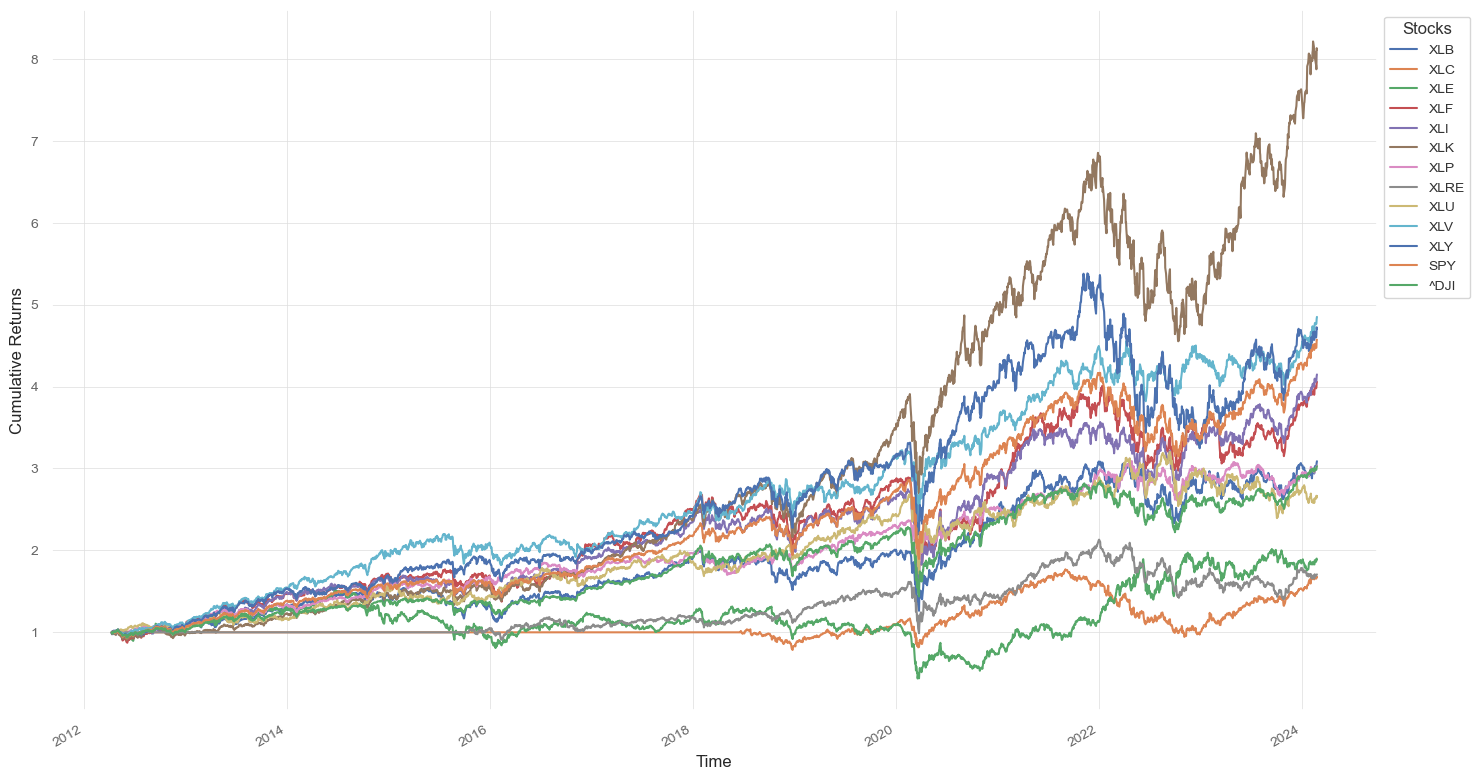

In [63]:
fig, ax = plt.subplots(figsize=(20, 8))
(1+df_returns).cumprod().plot(ax=ax)
(1+bdf_returns).cumprod().plot(ax=ax)
leg = ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10, title='Stocks')
plt.setp(leg.get_title(), fontsize=12) # Set legend title fontsize
ax.set_xlabel('Time', fontsize=12) # Adjust x-axis label fontsize
ax.set_ylabel('Cumulative Returns', fontsize=12) # Adjust y-axis label fontsize
ax.tick_params(axis='both', which='major', labelsize=10) # Adjust tick label fontsize
plt.tight_layout(rect=[0, 0, 0.75, 1]) # Adjust layout to make room for legend
plt.show()

In [5]:
from arch import arch_model
from statsmodels.tsa.arima.model import ARIMA

warnings.filterwarnings("ignore", message="Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.")
warnings.filterwarnings("ignore", message="Non-invertible starting MA parameters found. Using zeros as starting parameters.")

class FV_BLB_Model:
    def __init__(self, R, R_mean, R_variance):
        self.R = R
        self.a = None
        self.B = None
        self.Omega = None
        self.ff_factors = self.fetch_fama_french_factors()
        self.R_mean = R_mean
        self.R_variance = R_variance
        
        self.pr_R_mean = None
        self.pr_R_variance = None
        self.ff_R_mean = None
        self.ff_R_variance = None

    def fit_arima_garch(self, series, exog=None):
        """
        Fits an ARIMA-GARCH model to the given time series.
    
        Parameters:
        series (pd.Series): The time series data to model.
    
        Returns:
        mean_forecast (float): The forecasted mean return.
        variance_forecast (float): The forecasted return variance.
        """
        scale_factor = 1000  # Scale factor for rescaling the series
        try:
            # Ensure the series has a continuous date range index
            series = series.reindex(pd.date_range(start=series.index.min(), end=series.index.max(), freq='B')).fillna(0)
            if exog is not None:
                exog = exog.reindex(series.index).fillna(0)
    
            # Clean the series
            series = series.dropna()
            if exog is not None:
                exog = exog.loc[series.index]
    
            # Rescale the series
            series_rescaled = series * scale_factor
    
            # Fit ARIMA model to the series and forecast mean
            if exog is not None:
                arima_model = ARIMA(series_rescaled, order=(1, 1, 1), exog=exog).fit(method_kwargs={'maxiter': 200, 'disp': 0})
                mean_forecast_rescaled = arima_model.forecast(steps=1, exog=exog.iloc[-1:]).iloc[0]
            else:
                arima_model = ARIMA(series_rescaled, order=(1, 1, 1)).fit(method_kwargs={'maxiter': 200, 'disp': 0})
                mean_forecast_rescaled = arima_model.forecast(steps=1).iloc[0]
            
            arima_resid = arima_model.resid
    
            # Fit GARCH model to the residuals of the ARIMA model
            garch_model = arch_model(arima_resid, vol='Garch', p=1, q=1).fit(disp="off")
    
            # Forecast variance
            garch_forecast = garch_model.forecast(horizon=1)
    
            # Extracting the variance forecast correctly
            if garch_forecast.variance is not None and not garch_forecast.variance.empty:
                variance_forecast_rescaled = garch_forecast.variance.iloc[0, 0]
            else:
                raise ValueError("GARCH forecast variance is empty.")
    
            # Rescale the forecasts back to the original scale
            mean_forecast = mean_forecast_rescaled / scale_factor
            variance_forecast = variance_forecast_rescaled / (scale_factor ** 2)
            # variance_forecast = series.var() # Quick approximation
            
        except Exception as e:
            raise RuntimeError(f"Failed to fit ARIMA-GARCH model for series: {series.name}. Error: {e}")
    
        return mean_forecast, variance_forecast
        
    @staticmethod
    def fetch_fama_french_factors():
        """
        Fetches the Fama-French 3 factors from Ken French's data library.

        Returns:
        pd.DataFrame: DataFrame containing the Fama-French 3 factors.
        """
        url = "https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_Factors_daily_CSV.zip"
        ff_factors = pd.read_csv(url, skiprows=3)
        ff_factors.columns = ff_factors.columns.str.strip()
        ff_factors.dropna(inplace=True)
        ff_factors.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
        ff_factors['Date'] = pd.to_datetime(ff_factors['Date'], format='%Y%m%d')
        ff_factors = ff_factors.set_index('Date')
        return ff_factors

    def fit_factor_model(self, R, f):
        """
        Fits a cross-sectional factor model to the return data R and factor data f.

        Parameters:
        R (pd.DataFrame): The DataFrame containing the returns data with shape (n_samples, m_assets).
        f (pd.DataFrame): The DataFrame containing the factor data with shape (n_samples, k_factors).

        Returns:
        a (np.array): The intercept vector with shape (m_assets,).
        B (np.array): The factor loadings matrix with shape (m_assets, k_factors).
        Omega (np.array): The idiosyncratic error covariance matrix with shape (m_assets, m_assets).
        """    
        # Ensure R and f have the same number of samples
        assert R.shape[0] == f.shape[0], "R and f must have the same number of samples."

        # Convert R and f to numpy arrays
        R = R.values
        f = f.values

        # Number of assets and factors
        m = R.shape[1]
        k = f.shape[1]

        # Add a column of ones to f for the intercept term
        F = np.hstack([np.ones((f.shape[0], 1)), f])

        # Solve for B using Ordinary Least Squares (OLS)
        B_with_intercept = np.linalg.inv(F.T @ F) @ F.T @ R

        # Extract the intercept term a
        a = B_with_intercept[0, :]

        # Extract the factor loadings matrix B
        B = B_with_intercept[1:, :].T

        # Calculate the residuals e = R - F @ B_with_intercept
        e = R - F @ B_with_intercept

        # Calculate the covariance matrix of the residuals Omega
        Omega = np.diag(np.var(e, axis=0))

        return a, B, Omega

    def FV_BLB(self):
        """
        Calculates the mean and variance for the Black-Litterman model using a specified return dataset.

        Returns:
        mean (np.array): The calculated mean vector.
        variance (np.array): The calculated variance matrix.
        """
        R = self.R
        n = len(R.index)
        m = len(R.columns)

        # Import factors
        combined_data = pd.concat([df_returns, self.ff_factors], axis=1).dropna()
        market_returns_aligned = combined_data[df.columns]
        
        ff_factors_aligned = combined_data[['Mkt-RF', 'SMB', 'HML']]
        f = ff_factors_aligned.loc[R.index]
        R_f = combined_data['RF'].loc[R.index]  # Risk-free return data
        R_ = R.sub(R_f, axis=0)  # Excess return

        # Factors' realization and uncertainty
        f_q = ff_factors_aligned.iloc[ff_factors_aligned.index.get_loc(R.index[-1]) + 1]  # +1: cross-sectional estimation instead of prediction
        Sigma_f = f.cov().values

        # a, B, Omega are estimated parameters from a rolling window
        self.a, self.B, self.Omega = self.fit_factor_model(R, f)  # R or R_ with a = a_ + R_f

        
        # Prior
        pi = np.zeros(m)
        Sigma = np.zeros((m, m))

        # (1). Historical
        # pi = self.R_mean  # Prior mean returns
        # Sigma = self.R_variance  # Prior covariance matrix

        # (2). ARIMA-GARCH
        # for i in range(m):
        #     series = R.iloc[:, i]
        #     pi[i], Sigma[i, i] = self.fit_arima_garch(series)

        # (3). ARIMAX-GARCH
        for i in range(m):
            series = R.iloc[:, i]
            pi[i], Sigma[i, i] = self.fit_arima_garch(series, exog=f)
        
        tau = 1  # Smaller: Closer to Prior?
        C = Sigma * tau
        

        # Calculate posterior mean and variance using the FV_BLB formula
        G = np.linalg.pinv(C) + np.linalg.pinv(self.Omega) + (np.linalg.pinv(self.B)).T @ np.linalg.pinv(Sigma_f) @ (np.linalg.pinv(self.B))
        D = np.linalg.pinv(C) @ pi + np.linalg.pinv(self.Omega) @ (self.a + self.B @ f_q) + (np.linalg.pinv(self.B)).T @ np.linalg.pinv(Sigma_f) @ (np.linalg.pinv(self.B) @ self.a + f_q)
        variance = np.linalg.pinv(G)
        mean = variance @ D
        
        # Prior model estimation
        self.pr_R_mean = pi
        self.pr_R_variance = C
        
        # Fama-French model estimation
        self.ff_R_mean = self.a + self.B @ f_q
        self.ff_R_variance = self.B @ Sigma_f @ (self.B).T + self.Omega

        # Posterior model estimation
        return mean, variance

In [174]:
R = bl_strategy.GR_n[100]  #R: 50n * 28m #Test
tau = 1  # Bigger: focus on original MKW?
pi = R.mean().values  # Prior mean returns
Sigma = R.cov().values  # Prior covariance matrix
C = Sigma * tau

In [178]:
f

,Mkt-RF,SMB,HML
Date,,,
2022-09-02,-0.99,-0.07,1.06
2022-09-06,-0.51,-0.44,-0.52
2022-09-07,1.92,0.69,-1.53
2022-09-08,0.78,-0.08,-0.20
2022-09-09,1.67,0.53,-0.51
...,...,...,...
2023-01-20,1.95,0.13,-0.70
2023-01-23,1.29,0.18,-1.01
2023-01-24,-0.16,-0.23,0.20


In [175]:
fm = FV_BLB_Model(R, R.mean().values, R.cov().values)  # Initialize Model
ff_factors = fm.fetch_fama_french_factors()
combined_data = pd.concat([df_returns, ff_factors], axis=1).dropna()
market_returns_aligned = combined_data[df.columns]
ff_factors_aligned = combined_data[['Mkt-RF', 'SMB', 'HML']]

f = ff_factors_aligned.loc[R.index]  #f: 50n * 3k
f_q = ff_factors_aligned.iloc[ff_factors_aligned.index.get_loc(R.index[-1]) + 1]
Sigma_f = f.cov().values

In [145]:
f.iloc[-1:]

,Mkt-RF,SMB,HML
Date,,,
2022-11-11,1.07,0.28,-1.08


In [6]:
class PortfolioOptimizer:
    def __init__(self, R, strategy='MKW'):
        """
        Initializes the PortfolioOptimizer with return data and strategy type.
        
        Parameters:
        R (pd.DataFrame): The DataFrame containing the returns data.
        strategy (str): The optimization strategy, either 'MKW' or 'BL'.
        """
        self.R = R
        self.strategy = strategy
        self.m = len(R.columns)
        self.mean = R.mean().values
        self.variance = R.cov().values
        
        self.fm = FV_BLB_Model(self.R, self.mean, self.variance)  # Initialize Model
        self.bl_mu, self.bl_Sigma = self.fm.FV_BLB()  # Run Model
        
        self.mu, self.Sigma = self._get_mu_sigma()  # Model posterior estimation on mean and variance
        self.prior_mu, self.prior_Sigma = self._get_mu_sigma(estimation='prior')
        self.likelihood_mu, self.likelihood_Sigma = self._get_mu_sigma(estimation='likelihood')  # Model likelihood(view) estimation mean and variance

    def _get_mu_sigma(self, estimation = 'posterior'):
        """
        Determines the expected returns and covariance matrix based on the strategy.
        
        Returns:
        mu (np.array): The expected returns.
        Sigma (np.array): The covariance matrix.
        """
        ## get prior (ARIMA) or likelihood (FM) estimation
        if estimation == 'prior':
            return self.fm.pr_R_mean, self.fm.pr_R_variance
        
        elif estimation == 'likelihood':
            return self.fm.ff_R_mean, self.fm.ff_R_variance
        
        ## get posterior (MKW/BL) estimation
        elif estimation == 'posterior':
            if self.strategy == 'MKW':
                return self.mean, self.variance
            elif self.strategy == 'BL':
                return self.bl_mu, self.bl_Sigma
            else:
                raise ValueError("Strategy not recognized. Use 'MKW' or 'BL'.")

    def optimize(self):
        """
        Optimizes the portfolio weights to maximize the Sharpe ratio.
        
        Returns:
        solution (list): The optimized portfolio weights.
        """
        with gp.Env(empty=True) as env:
            env.setParam('OutputFlag', 0)
            env.setParam('DualReductions', 0)
            env.start()
            with gp.Model(env=env, name="portfolio") as m:
                y = m.addMVar(self.m, name="y", lb=0, ub=gp.GRB.INFINITY)
                
                exp_return = y @ self.mu
                variance = (y @ self.Sigma) @ y
                
                m.setObjective(variance, gp.GRB.MINIMIZE)
                m.addConstr(exp_return == 1)
                print('optimizing...')
                m.optimize()

                # Check if the status is INF_OR_UNBD (code 4)
                if m.status == gp.GRB.INF_OR_UNBD:
                    print("Model status is INF_OR_UNBD. Reoptimizing with DualReductions set to 0.")
                
                if m.status == gp.GRB.OPTIMAL or m.status == gp.GRB.SUBOPTIMAL:
                    # Extract the solution
                    solution = [m.getVarByName(f'y[{i}]').X for i in range(self.m)]
                    
                    # Normalize the solution
                    solution = [1/sum(solution) * x for x in solution]
                    
                    return solution


def max_sharpe_MKW(R):
    MKW_portfolio = PortfolioOptimizer(R, strategy='MKW')
    return MKW_portfolio

def max_sharpe_BL(R):
    BL_portfolio = PortfolioOptimizer(R, strategy='BL')
    return BL_portfolio


In [7]:
from datetime import datetime

class BlackLittermanStrategy:
    def __init__(self, df, df_returns, lookback):
        """
        Initializes the BlackLittermanStrategy class with the given data and lookback period.
        
        Parameters:
        df (pd.DataFrame): The DataFrame containing the price data.
        df_returns (pd.DataFrame): The DataFrame containing the returns data.
        lookback (int): The lookback period for calculating returns.
        """
        self.df = df
        self.df_returns = df_returns
        self.lookback = lookback
        self.weights_mkw = pd.DataFrame(index=df.index, columns=df.columns)
        self.weights_bl = pd.DataFrame(index=df.index, columns=df.columns)
        self.strategy = df_returns.copy()
        self.strategy['portfolio mkw'] = pd.Series(index=df.index, data=0)
        self.strategy['portfolio bl'] = pd.Series(index=df.index, data=0)
        self.rb_data = []
        self.GR_n = []
        self.has_run = False

        df1 = df_returns.copy()
        df1.columns = pd.MultiIndex.from_product([['df_returns'], df.columns])
        
        df2 = pd.DataFrame(index=df.index, columns=df.columns)
        df2.columns = pd.MultiIndex.from_product([['mkw_returns'], df.columns])

        df3 = pd.DataFrame(index=df.index, columns=df.columns)
        df3.columns = pd.MultiIndex.from_product([['arima_returns'], df.columns])
        
        df4 = pd.DataFrame(index=df.index, columns=df.columns)
        df4.columns = pd.MultiIndex.from_product([['fm_returns'], df.columns])

        df5 = pd.DataFrame(index=df.index, columns=df.columns)
        df5.columns = pd.MultiIndex.from_product([['bl_returns'], df.columns])
        
        self.pricing = pd.concat([df1, df2, df3, df4, df5], axis=1)
    
    def gather_rebalance_data(self):
        """
        Gathers the rebalancing data by determining the rebalancing dates and the corresponding DJI/SP components.
        """
        #rb_idx = self.df.groupby(self.df.index.strftime('%Y-%W')).head(1).index  # Monthly Rb: '%Y-%m'; Weekly Rb: '%Y-%W'
        rb_idx = self.df.index # Daily Rb
        rb_daily = self.df.index
        
        for rb_date in rb_daily:
            rb_date_index = self.df.index.get_loc(rb_date)
            if rb_date_index > self.lookback:
                if (rb_date in rb_idx):
                    rb_date_parsed = rb_date.to_pydatetime()
                    for date in sorted(_update_date, reverse=True):
                        if datetime.strptime(date, "%Y-%m-%d") <= rb_date_parsed:
                            _stocks = sorted(_components[date])
                            break
                    self.rb_data.append((rb_date, rb_date_index, _stocks))
    
    def gather_return_data(self):
        """
        Gathers the return data for the lookback period ending at each rebalancing date.
        """
        for rb in self.rb_data:
            self.GR_n.append(self.df_returns[rb[2]].iloc[rb[1] - self.lookback:rb[1]])
        print(f'GR_n: {self.GR_n[0].shape} * {len(self.GR_n)} periods')
    
    def calculate_weights(self):
        """
        Calculates the weights for the Markowitz (MKW) and Black-Litterman (BL) strategies based on the gathered return data.
        """
        for R_n in self.GR_n:
            date = self.df.index[self.df.index.get_loc(R_n.index[-1]) + 1]
            print(f'Decision after {R_n.index[-1]} is on {date}:')

            # Calculate MKW weights and fill missing values with 0
            MKW_portfolio = max_sharpe_MKW(R_n)
            #self.weights_mkw.loc[date, R_n.columns] = MKW_portfolio.optimize()
            #self.weights_mkw.loc[date] = self.weights_mkw.loc[date].fillna(0)
            
            # Calculate BL weights and fill missing values with 0
            BL_portfolio = max_sharpe_BL(R_n)
            #self.weights_bl.loc[date, R_n.columns] = BL_portfolio.optimize()
            #self.weights_bl.loc[date] = self.weights_bl.loc[date].fillna(0)

            # Calculate price
            self.pricing.loc[date, ('mkw_returns', R_n.columns)] = MKW_portfolio.mu
            self.pricing.loc[date, ('bl_returns', R_n.columns)] = BL_portfolio.mu
            self.pricing.loc[date, ('arima_returns', R_n.columns)] = BL_portfolio.prior_mu
            self.pricing.loc[date, ('fm_returns', R_n.columns)] = BL_portfolio.likelihood_mu
        
        # Forward-fill weights to apply the same weights until the next rebalance date
        self.weights_mkw.ffill(inplace=True)
        self.weights_mkw = self.weights_mkw.infer_objects(copy=False)

        self.weights_bl.ffill(inplace=True)
        self.weights_bl = self.weights_bl.infer_objects(copy=False)
    
    def calculate_portfolio_returns(self):
        """
        Calculates the portfolio returns based on the weights and daily returns.
        """
        for j in range(len(self.df) - 1):
            self.strategy['portfolio mkw'] = self.strategy['portfolio mkw'].astype(float)
            self.strategy.iloc[j + 1, self.strategy.columns.get_loc('portfolio mkw')] = np.sum(self.weights_mkw.iloc[j] * self.df_returns.iloc[j + 1])
            self.strategy['portfolio bl'] = self.strategy['portfolio bl'].astype(float)
            self.strategy.iloc[j + 1, self.strategy.columns.get_loc('portfolio bl')] = np.sum(self.weights_bl.iloc[j] * self.df_returns.iloc[j + 1])
    
    def run_strategy(self):
        """
        Runs the Black-Litterman strategy, ensuring it is only executed once.
        
        Returns:
        strategy (pd.DataFrame): The DataFrame containing the portfolio returns for both MKW and BL strategies.
        weights_mkw (pd.DataFrame): The DataFrame containing the MKW strategy weights.
        weights_bl (pd.DataFrame): The DataFrame containing the BL strategy weights.
        """
        if not self.has_run:
            self.gather_rebalance_data()
            self.gather_return_data()
            self.calculate_weights()
            self.calculate_portfolio_returns()
            self.has_run = True
        return self.strategy, self.weights_mkw, self.weights_bl

In [9]:
lookback_periods = [100]

# Initialize a list to store the strategy results
portfolio = []

# Create and run the BlackLittermanStrategy for each lookback period
for lookback in lookback_periods:
    bl_strategy = BlackLittermanStrategy(df.copy(), df_returns.copy(), lookback)
    portfolio.append(bl_strategy.run_strategy())

bl_pricing = bl_strategy.pricing.copy()

GR_n: (100, 11) * 370 periods
Decision after 2022-09-01 00:00:00 is on 2022-09-02 00:00:00:
Decision after 2022-09-02 00:00:00 is on 2022-09-06 00:00:00:
Decision after 2022-09-06 00:00:00 is on 2022-09-07 00:00:00:
Decision after 2022-09-07 00:00:00 is on 2022-09-08 00:00:00:
Decision after 2022-09-08 00:00:00 is on 2022-09-09 00:00:00:
Decision after 2022-09-09 00:00:00 is on 2022-09-12 00:00:00:
Decision after 2022-09-12 00:00:00 is on 2022-09-13 00:00:00:
Decision after 2022-09-13 00:00:00 is on 2022-09-14 00:00:00:
Decision after 2022-09-14 00:00:00 is on 2022-09-15 00:00:00:
Decision after 2022-09-15 00:00:00 is on 2022-09-16 00:00:00:
Decision after 2022-09-16 00:00:00 is on 2022-09-19 00:00:00:
Decision after 2022-09-19 00:00:00 is on 2022-09-20 00:00:00:
Decision after 2022-09-20 00:00:00 is on 2022-09-21 00:00:00:
Decision after 2022-09-21 00:00:00 is on 2022-09-22 00:00:00:
Decision after 2022-09-22 00:00:00 is on 2022-09-23 00:00:00:
Decision after 2022-09-23 00:00:00 is on

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

class ModelEvaluator:
    def __init__(self, data):
        self.data = data
        self.r = None
        self.mkw = None
        self.arima = None
        self.fm = None
        self.bl = None

    def set_asset(self, asset):
        asset_data = self.data.loc[:, (['df_returns', 'mkw_returns', 'arima_returns', 'fm_returns', 'bl_returns'], [asset])].dropna()
        asset_data = pd.DataFrame(asset_data.values, index=asset_data.index, columns=['r', 'mkw', 'arima', 'fm', 'bl'])
        asset_data = (1 + asset_data).cumprod()
        # asset_data['r'] = (1 + asset_data['r']).cumprod()
        # asset_data['mkw'] = asset_data['r'].shift(1).fillna(1) * (1 + asset_data['mkw'])
        # asset_data['arima'] = asset_data['r'].shift(1).fillna(1) * (1 + asset_data['arima'])
        # asset_data['fm'] = asset_data['r'].shift(1).fillna(1) * (1 + asset_data['fm'])
        # asset_data['bl'] = asset_data['r'].shift(1).fillna(1) * (1 + asset_data['bl'])
        self.r = asset_data['r']
        self.mkw = asset_data['mkw']
        self.arima = asset_data['arima']
        self.fm = asset_data['fm']
        self.bl = asset_data['bl']
        plt.figure()
        plt.yscale("log")
        plt.plot(asset_data)
        plt.legend(['r', 'mkw', 'arima', 'fm', 'bl'], loc='upper left')
        plt.title(f"Cumulative Returns for {asset}")
        plt.show()

    def calculate_r2(self, y_true, y_pred):
        return r2_score(y_true, y_pred)

    def calculate_mse(self, y_true, y_pred):
        return mean_squared_error(y_true, y_pred)

    def calculate_mae(self, y_true, y_pred):
        return mean_absolute_error(y_true, y_pred)
        
    def calculate_msle(self, y_true, y_pred):
        y_true = np.array(y_true).astype('float')
        y_pred = np.array(y_pred).astype('float')
        return mean_squared_error(np.log(y_true), np.log(y_pred)) * 100
        
    def print_r2_scores(self):
        print(f"MKW R-squared (R2): {self.calculate_r2(self.r, self.mkw)}")
        print(f"ARIMA R-squared (R2): {self.calculate_r2(self.r, self.arima)}")
        print(f"FM R-squared (R2): {self.calculate_r2(self.r, self.fm)}")
        print(f"BL R-squared (R2): {self.calculate_r2(self.r, self.bl)}")

    def print_error_metrics(self):
        print(f"MSE MKW: {self.calculate_mse(self.r, self.mkw)}")
        print(f"MSE ARIMA: {self.calculate_mse(self.r, self.arima)}")
        print(f"MSE FM: {self.calculate_mse(self.r, self.fm)}")
        print(f"MSE BL: {self.calculate_mse(self.r, self.bl)}")
        
        print(f"MAE MKW: {self.calculate_mae(self.r, self.mkw)}")
        print(f"MAE ARIMA: {self.calculate_mae(self.r, self.arima)}")
        print(f"MAE FM: {self.calculate_mae(self.r, self.fm)}")
        print(f"MAE BL: {self.calculate_mae(self.r, self.bl)}")
        
        print(f"MSLE MKW: {self.calculate_msle(self.r, self.mkw)} %")
        print(f"MSLE ARIMA: {self.calculate_msle(self.r, self.arima)} %")
        print(f"MSLE FM: {self.calculate_msle(self.r, self.fm)} %")
        print(f"MSLE BL: {self.calculate_msle(self.r, self.bl)} %")

    def print_correlations(self):
        print(f"Correlation (r, bl): {self.r.corr(self.bl)}")
        print(f"Correlation (r, fm): {self.r.corr(self.fm)}")
        print(f"Correlation (r, arima): {self.r.corr(self.arima)}")
        print(f"Correlation (bl, fm): {self.bl.corr(self.fm)}")
        print(f"Correlation (bl, arima): {self.bl.corr(self.arima)}")

    def calculate_cross_correlation(self, y_true, y_pred):
        correlation = np.correlate(y_true - np.mean(y_true), y_pred - np.mean(y_pred), mode='full')
        lags = np.arange(-len(y_true) + 1, len(y_true))
        correlation /= (len(y_true) * np.std(y_true) * np.std(y_pred))
        return lags, correlation

    def plot_cross_correlation(self):
        fig, axes = plt.subplots(2, 2, figsize=(14, 8))

        lags, correlation = self.calculate_cross_correlation(self.r, self.mkw)
        axes[0, 0].plot(lags, correlation)
        axes[0, 0].set_title('Cross-Correlation (r, mkw)')

        lags, correlation = self.calculate_cross_correlation(self.r, self.arima)
        axes[0, 1].plot(lags, correlation)
        axes[0, 1].set_title('Cross-Correlation (r, arima)')

        lags, correlation = self.calculate_cross_correlation(self.r, self.fm)
        axes[1, 0].plot(lags, correlation)
        axes[1, 0].set_title('Cross-Correlation (r, fm)')

        lags, correlation = self.calculate_cross_correlation(self.r, self.bl)
        axes[1, 1].plot(lags, correlation)
        axes[1, 1].set_title('Cross-Correlation (r, bl)')

        plt.tight_layout()
        plt.show()

    def dynamic_time_warping(self, y_true, y_pred):
        # Assuming dtw implementation exists or import from a suitable library
        # return dtw(y_true, y_pred).distance
        pass

    def print_dtw_distances(self):
        print(f"DTW distance (r, mkw): {self.dynamic_time_warping(self.r, self.mkw)}")
        print(f"DTW distance (r, arima): {self.dynamic_time_warping(self.r, self.arima)}")
        print(f"DTW distance (r, fm): {self.dynamic_time_warping(self.r, self.fm)}")
        print(f"DTW distance (r, bl): {self.dynamic_time_warping(self.r, self.bl)}")

    def mean_absolute_scaled_error(self, y_true, y_pred):
        n = len(y_true)
        d = np.abs(np.diff(y_true)).sum() / (n - 1)
        errors = np.abs(y_true - y_pred)
        return errors.mean() / d

    def print_mase_scores(self):
        print(f"MASE (r, mkw): {self.mean_absolute_scaled_error(self.r, self.mkw)}")
        print(f"MASE (r, arima): {self.mean_absolute_scaled_error(self.r, self.arima)}")
        print(f"MASE (r, fm): {self.mean_absolute_scaled_error(self.r, self.fm)}")
        print(f"MASE (r, bl): {self.mean_absolute_scaled_error(self.r, self.bl)}")


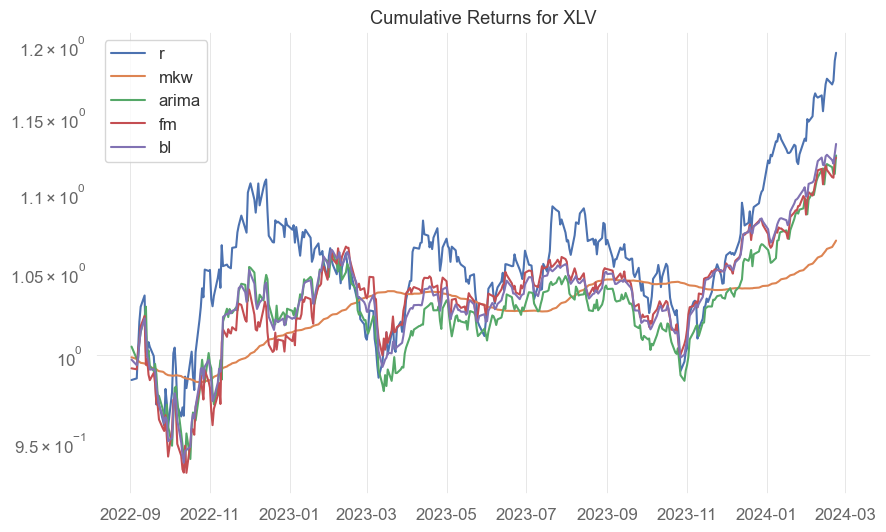

MKW R-squared (R2): -0.23698766394019044
ARIMA R-squared (R2): 0.30218582960535945
FM R-squared (R2): 0.3541996054711949
BL R-squared (R2): 0.48149058315084825
MSE MKW: 0.0022286214503789395
MSE ARIMA: 0.0012572183812781126
MSE FM: 0.0011635076515845236
MSE BL: 0.0009341735914590067
MAE MKW: 0.03749115497040739
MAE ARIMA: 0.030367448785522513
MAE FM: 0.02654197978675544
MAE BL: 0.024735729855347194
MSLE MKW: 0.19665421920879475 %
MSLE ARIMA: 0.11199095783761517 %
MSLE FM: 0.10414186835475056 %
MSLE BL: 0.08301001861897137 %
Correlation (r, bl): 0.8680007900842096
Correlation (r, fm): 0.7966656088974868
Correlation (r, arima): 0.8900802220072201
Correlation (bl, fm): 0.9772567486391242
Correlation (bl, arima): 0.9797592090142758
MASE (r, mkw): 5.511642786403583
MASE (r, arima): 4.464373801562473
MASE (r, fm): 3.9019846559544558
MASE (r, bl): 3.63644457289363


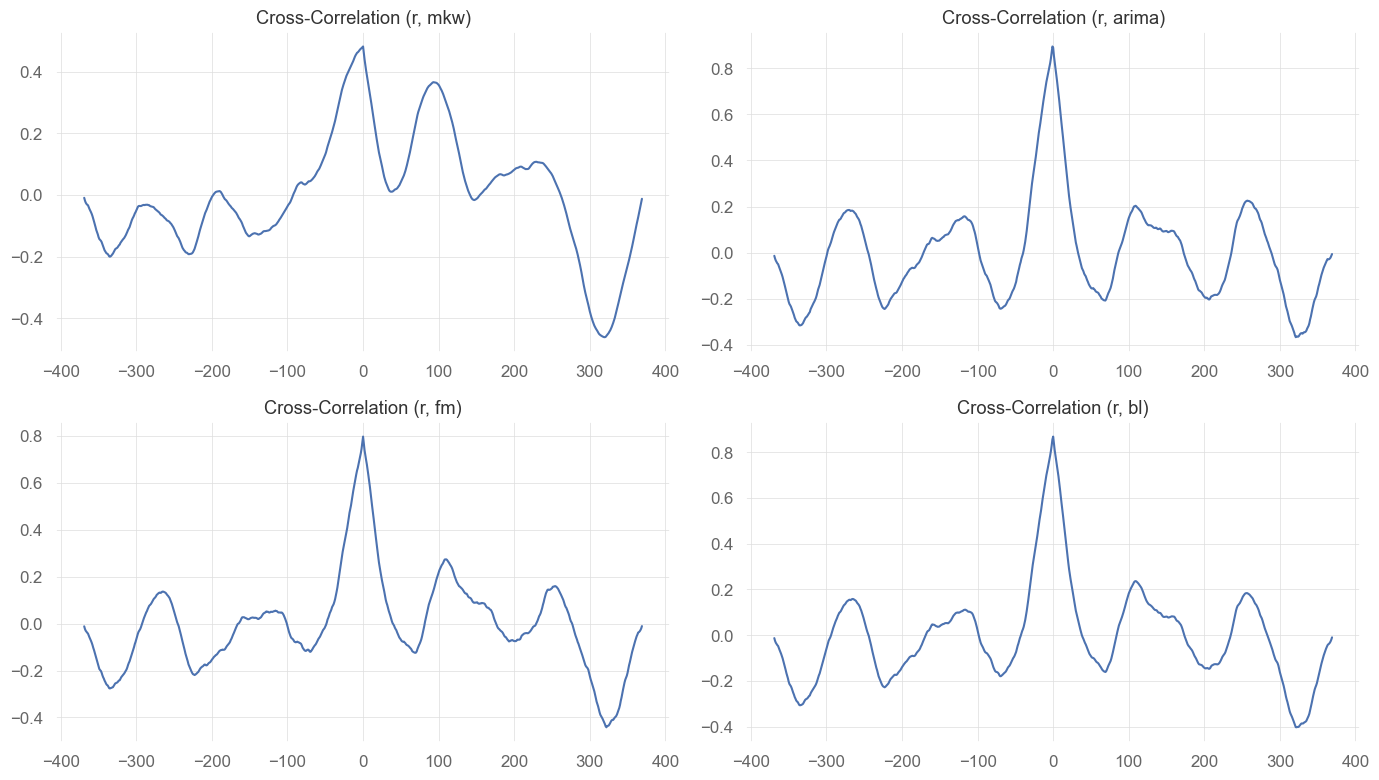

In [64]:
# Usage
bl_pricing = bl_strategy.pricing.copy()

evaluator = ModelEvaluator(bl_pricing)
evaluator.set_asset('XLV')
evaluator.print_r2_scores()
evaluator.print_error_metrics()
evaluator.print_correlations()
evaluator.print_mase_scores()
evaluator.plot_cross_correlation()

IndexError: single positional indexer is out-of-bounds

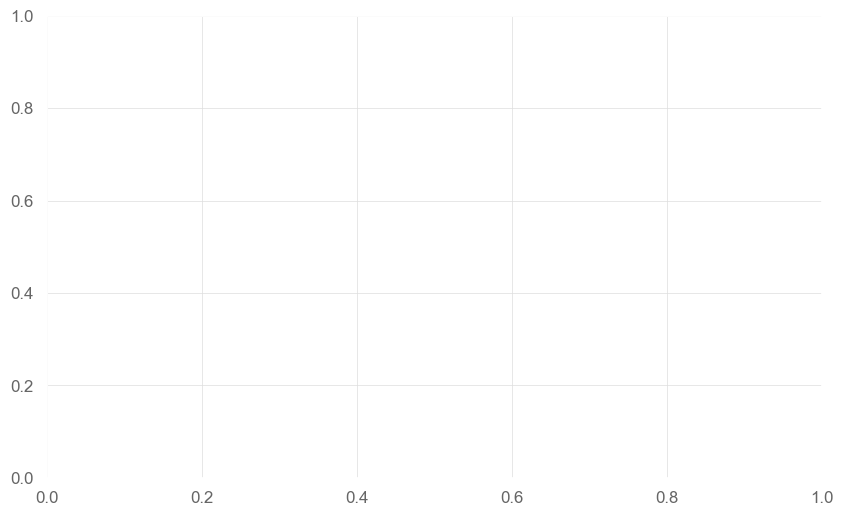

In [106]:
portfolio_type = 'portfolio bl'
benchmark = ['portfolio mkw']
plot_performance(portfolio, portfolio_type, benchmark)

df_bl = pd.DataFrame()
df_bl['EQW'] = eqw[0]['Return']
df_bl['RP'] = rp[0][0]['Return']
df_bl['SPY'] = bdf_returns['SPY']
df_bl['^DJI'] = bdf_returns['^DJI']
for i, value in enumerate(portfolio):
    df_bl[f'MKW {i+1}'] = value[0]['portfolio mkw']
    df_bl[f'BL {i+1}'] = value[0]['portfolio bl']

qs.reports.metrics(df_bl, mode="full", display=True)

for w in portfolio:
    plot_allocation(w[1])
    plot_allocation(w[2])